# English Letter Recognition

The goal of this project is to use various machine learning techniques to recognize the correct letter of the English alphabet given.


This dataset uses 16 features to distinguish what letter of the alphabet is represented.
The desciption of these features is in the /docs directory. *This is also shown in presentation*

I attempt to use : 1. Decision Tree Classifier 2. K-Nearest Neighbors 3. Random Forest Classifier 4. Support Vector Classifier.
I will now go through the process of each . Some of the code takes a longer time to run. The outputs of these cells are in the /pics directory. *This is also shown in presentation*

In [1]:
from sklearn import tree
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import warnings

warnings.simplefilter("ignore") 
#warnings.filterwarnings("ignore", category=DeprecationWarning)

## Dataset Information is shown here : 

In [2]:
df = pd.read_csv('data/letter-recognition.csv')

In [3]:
# PRINT SOME ROWS
print(df['letter'])
print(df.head())

0        T
1        I
2        D
3        N
4        G
        ..
19995    D
19996    C
19997    T
19998    S
19999    A
Name: letter, Length: 20000, dtype: object
  letter  xbox  ybox  width  height  onpix  xbar  ybar  x2bar  y2bar  xybar  \
0      T     2     8      3       5      1     8    13      0      6      6   
1      I     5    12      3       7      2    10     5      5      4     13   
2      D     4    11      6       8      6    10     6      2      6     10   
3      N     7    11      6       6      3     5     9      4      6      4   
4      G     2     1      3       1      1     8     6      6      6      6   

   x2ybar  xy2bar  xedge  xedgey  yedge  yedgex  
0      10       8      0       8      0       8  
1       3       9      2       8      4      10  
2       3       7      3       7      3       9  
3       4      10      6      10      2       8  
4       5       9      1       7      5      10  


In [4]:
# PRINT THE DIMENSIONS
print(df.shape)

(20000, 17)


In [5]:
# PRINT THE INFORMATION
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   letter  20000 non-null  object
 1   xbox    20000 non-null  int64 
 2   ybox    20000 non-null  int64 
 3   width   20000 non-null  int64 
 4   height  20000 non-null  int64 
 5   onpix   20000 non-null  int64 
 6   xbar    20000 non-null  int64 
 7   ybar    20000 non-null  int64 
 8   x2bar   20000 non-null  int64 
 9   y2bar   20000 non-null  int64 
 10  xybar   20000 non-null  int64 
 11  x2ybar  20000 non-null  int64 
 12  xy2bar  20000 non-null  int64 
 13  xedge   20000 non-null  int64 
 14  xedgey  20000 non-null  int64 
 15  yedge   20000 non-null  int64 
 16  yedgex  20000 non-null  int64 
dtypes: int64(16), object(1)
memory usage: 2.6+ MB


In [6]:
# PRINT THE COLUMNS
print(df.columns)

Index(['letter', 'xbox', 'ybox', 'width', 'height', 'onpix', 'xbar', 'ybar',
       'x2bar', 'y2bar', 'xybar', 'x2ybar', 'xy2bar', 'xedge', 'xedgey',
       'yedge', 'yedgex'],
      dtype='object')


In [7]:
# PRINT THE DESCRIPTION
print(df.describe())

               xbox          ybox         width       height         onpix  \
count  20000.000000  20000.000000  20000.000000  20000.00000  20000.000000   
mean       4.023550      7.035500      5.121850      5.37245      3.505850   
std        1.913212      3.304555      2.014573      2.26139      2.190458   
min        0.000000      0.000000      0.000000      0.00000      0.000000   
25%        3.000000      5.000000      4.000000      4.00000      2.000000   
50%        4.000000      7.000000      5.000000      6.00000      3.000000   
75%        5.000000      9.000000      6.000000      7.00000      5.000000   
max       15.000000     15.000000     15.000000     15.00000     15.000000   

               xbar          ybar         x2bar         y2bar         xybar  \
count  20000.000000  20000.000000  20000.000000  20000.000000  20000.000000   
mean       6.897600      7.500450      4.628600      5.178650      8.282050   
std        2.026035      2.325354      2.699968      2.38082

In [8]:
# PRINT THE QUANTITY OF EACH LETTER (LABELS)
print(df.groupby('letter').letter.count())

letter
A    789
B    766
C    736
D    805
E    768
F    775
G    773
H    734
I    755
J    747
K    739
L    761
M    792
N    783
O    753
P    803
Q    783
R    758
S    748
T    796
U    813
V    764
W    752
X    787
Y    786
Z    734
Name: letter, dtype: int64


## 0. Preparation 
There seems to be a high correlation among the columns labeled : {xbox,ybox,width,height,onpix}. These columns can be ignored in favor of a more simple model and to prevent colinearity among the features.

In [9]:
print(df['letter'])
df2 = df.copy()
df2['letter'].replace(['A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y','Z'],
                     [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26], inplace=True)
print(df2.corr()) 
#print(df['letter'])

0        T
1        I
2        D
3        N
4        G
        ..
19995    D
19996    C
19997    T
19998    S
19999    A
Name: letter, Length: 20000, dtype: object
          letter      xbox      ybox     width    height     onpix      xbar  \
letter  1.000000  0.105349  0.001547  0.096817  0.041672 -0.002665 -0.049637   
xbox    0.105349  1.000000  0.757793  0.851514  0.672764  0.619097 -0.032595   
ybox    0.001547  0.757793  1.000000  0.671912  0.823207  0.555067  0.045690   
width   0.096817  0.851514  0.671912  1.000000  0.660215  0.765716  0.061959   
height  0.041672  0.672764  0.823207  0.660215  1.000000  0.644366  0.042844   
onpix  -0.002665  0.619097  0.555067  0.765716  0.644366  1.000000  0.139159   
xbar   -0.049637 -0.032595  0.045690  0.061959  0.042844  0.139159  1.000000   
ybar    0.308919  0.045545 -0.040925  0.024832 -0.020072 -0.028822 -0.356580   
x2bar  -0.109954  0.014306 -0.025019 -0.098611  0.082383 -0.011985 -0.053306   
y2bar   0.012275  0.052086  0.096478

In [11]:
y = df.iloc[:,0]
X = df.iloc[:,7:]

train_X,test_X,train_y,test_y = train_test_split(X,y,test_size=0.2,random_state=0)

## 1. Decision Tree Classification

In [12]:
model = DecisionTreeClassifier(criterion='gini', random_state=0)
model.fit(train_X,train_y)
y_pred = model.predict(test_X)
print("DECISION TREE CLASSIFIER TEST DATA ACCURACY SCORE (criterion='gini')")
print(accuracy_score(test_y,y_pred))

model = DecisionTreeClassifier(criterion='entropy', random_state=0)
model.fit(train_X,train_y)
y_pred = model.predict(test_X)
print("DECISION TREE CLASSIFIER TEST DATA ACCURACY SCORE (criterion='entropy')")
print(accuracy_score(test_y,y_pred))

model = DecisionTreeClassifier(criterion='log_loss', random_state=0)
model.fit(train_X,train_y)
y_pred = model.predict(test_X)
print("DECISION TREE CLASSIFIER TEST DATA ACCURACY SCORE (criterion='log_loss')")
print(accuracy_score(test_y,y_pred))


DECISION TREE CLASSIFIER TEST DATA ACCURACY SCORE (criterion='gini')
0.893
DECISION TREE CLASSIFIER TEST DATA ACCURACY SCORE (criterion='entropy')
0.89825
DECISION TREE CLASSIFIER TEST DATA ACCURACY SCORE (criterion='log_loss')
0.89825


## 2. KNN

   tests  TestData  TrainData
0      1   0.96450   0.999625
1      2   0.95950   0.978625
2      3   0.96550   0.981875
3      4   0.96300   0.974688
4      5   0.96375   0.973562
5      6   0.96050   0.969875
6      7   0.96050   0.968938
7      8   0.95750   0.966000
8      9   0.95575   0.964187
9     10   0.95425   0.961437


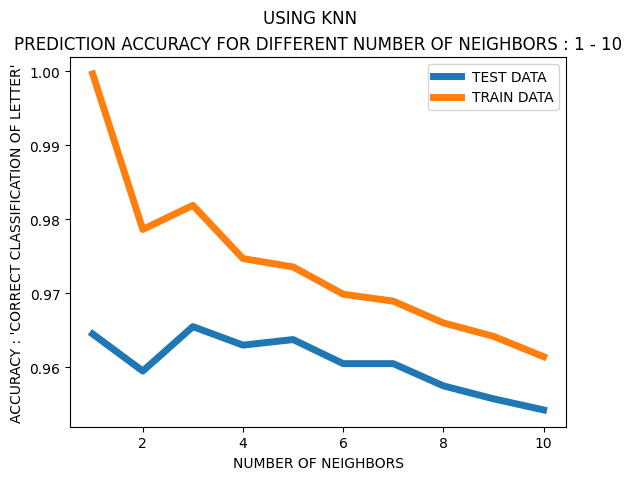

In [15]:
# PRINT THE PREDICTION ACCURACY FOR TEST / TRAIN DATA USING DIFFERENT VALUES OF n_neighbors

accuracys = []
accuracys2 = []
tests = []
for i in range(1,11):
    model = KNeighborsClassifier(n_neighbors=i,n_jobs=-1)
    model.fit(train_X,train_y)
    y_pred = model.predict(test_X)
    accuracys.append(accuracy_score(test_y,y_pred))
    y_pred = model.predict(train_X)
    accuracys2.append(accuracy_score(train_y,y_pred))
    tests.append(i)
    
graph = pd.DataFrame({'tests':tests, 'TestData':accuracys,'TrainData':accuracys2})
print(graph)
sns.lineplot(data=graph, x="tests", y="TestData", linewidth=5,label="TEST DATA")
sns.lineplot(data=graph, x="tests", y="TrainData", linewidth=5, label ="TRAIN DATA")
plt.title("PREDICTION ACCURACY FOR DIFFERENT NUMBER OF NEIGHBORS : 1 - 10")
plt.suptitle("USING KNN")
plt.xlabel("NUMBER OF NEIGHBORS")
plt.ylabel("ACCURACY : 'CORRECT CLASSIFICATION OF LETTER'")
#plt.xticks(fontsize=12)
#plt.yticks(fontsize=12)
#plt.legend(fontsize=12)
plt.show()

In [16]:
# I FOUND THAT THE n_neighbors=3,weights='distance' "Near neighbors have a greater effect " provided higher accuracy.
model = KNeighborsClassifier(n_neighbors=3,weights='distance')
model.fit(train_X, train_y)

y_pred = model.predict(test_X)
print("KNEIGHBORS CLASSIFIER TEST DATA ACCURACY SCORE (n_neighbors=3,weights='distance')")
print(accuracy_score(test_y,y_pred))
y_pred = model.predict(train_X)
print("KNEIGHBORS CLASSIFIER TRAIN DATA ACCURACY SCORE (n_neighbors=3,weights='distance')")
print(accuracy_score(train_y,y_pred))

KNEIGHBORS CLASSIFIER TEST DATA ACCURACY SCORE (n_neighbors=3,weights='distance')
0.9675
KNEIGHBORS CLASSIFIER TRAIN DATA ACCURACY SCORE (n_neighbors=3,weights='distance')
0.999625


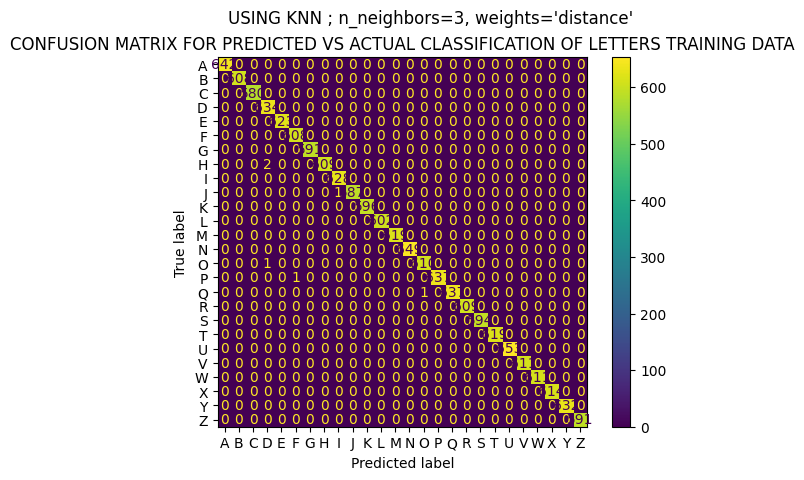

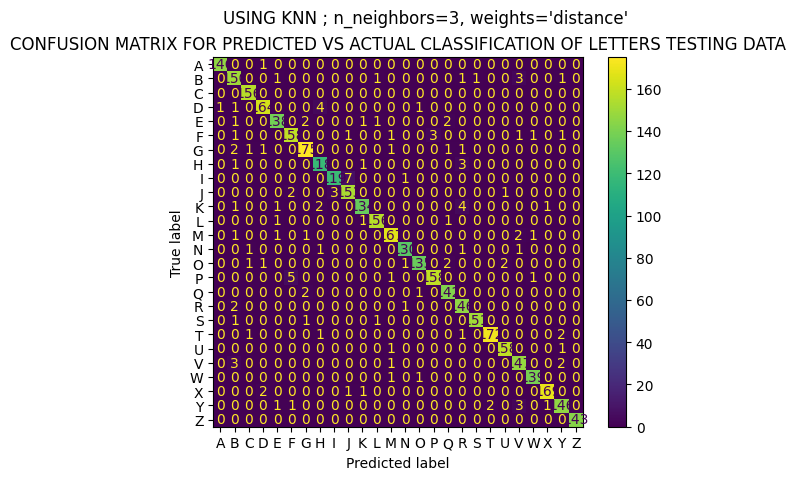

In [17]:
# Print the Train and Test Confusion Matrices using n_neighbors=3,weights='distance'
y_pred = model.predict(train_X)
ConfusionMatrixDisplay.from_predictions(train_y,y_pred)
plt.title("CONFUSION MATRIX FOR PREDICTED VS ACTUAL CLASSIFICATION OF LETTERS TRAINING DATA")
plt.suptitle("USING KNN ; n_neighbors=3, weights='distance'")
plt.show()

y_pred = model.predict(test_X)
ConfusionMatrixDisplay.from_predictions(test_y,y_pred)
plt.title("CONFUSION MATRIX FOR PREDICTED VS ACTUAL CLASSIFICATION OF LETTERS TESTING DATA")
plt.suptitle("USING KNN ; n_neighbors=3, weights='distance'")
plt.show()

## 3. Random Forest Classifier

   tests  TestData  TrainData
0    100   0.96250   0.999625
1    200   0.96450   0.999625
2    300   0.96275   0.999625
3    400   0.96350   0.999625
4    500   0.96450   0.999625
5    600   0.96475   0.999625
6    700   0.96425   0.999625
7    800   0.96450   0.999625
8    900   0.96450   0.999625
9   1000   0.96350   0.999625


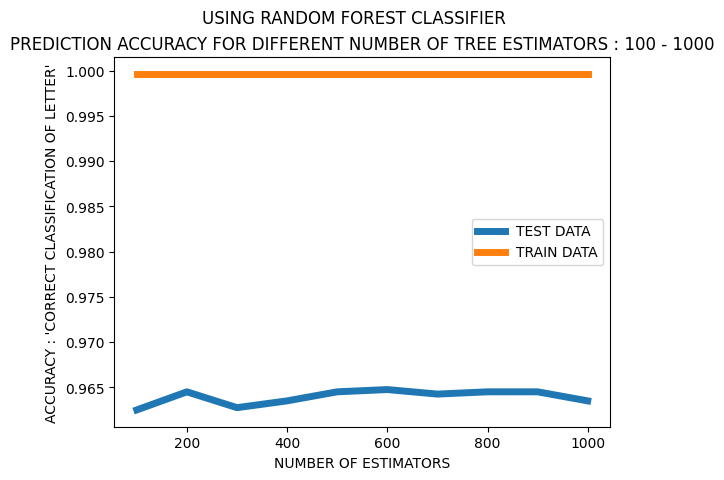

In [18]:
n_estimators = 100
accuracys = []
accuracys2 = []
tests = []

for i in range(10):
    model = RandomForestClassifier(random_state=0,n_estimators=n_estimators,n_jobs=-1)
    model.fit(train_X,train_y)
    y_pred = model.predict(test_X)
    accuracys.append(accuracy_score(test_y,y_pred))
    y_pred = model.predict(train_X)
    accuracys2.append(accuracy_score(train_y,y_pred))
    tests.append(n_estimators)
    n_estimators += 100

graph = pd.DataFrame({'tests':tests, 'TestData':accuracys,'TrainData':accuracys2})
print(graph)
sns.lineplot(data=graph, x="tests", y="TestData", linewidth=5,label="TEST DATA")
sns.lineplot(data=graph, x="tests", y="TrainData", linewidth=5, label ="TRAIN DATA")
plt.title("PREDICTION ACCURACY FOR DIFFERENT NUMBER OF TREE ESTIMATORS : 100 - 1000")
plt.suptitle("USING RANDOM FOREST CLASSIFIER")
plt.xlabel("NUMBER OF ESTIMATORS")
plt.ylabel("ACCURACY : 'CORRECT CLASSIFICATION OF LETTER'")
plt.show()

There are a lot of parameters so I will use a GridSearch . The parameters being tested are the {n_estimators 'increments of 100',criterion} <span style ="color:red"> *This code takes a long time to run.* </span>
Here is the result : <span style ="color:green">best_estimator = ('gini' , n_estimators = 600) </span>

In [19]:
# THIS TAKES A LONG TIME TO RUN YOU CAN SKIP THIS CELL . IT IS NOT NECESSARY.
parameters = {'n_estimators':np.arange(100,1000,100),'criterion':['gini','entropy','log_loss']}
model = RandomForestClassifier(random_state=0)
model_2 = GridSearchCV(model,parameters,n_jobs=-1)
model_2.fit(train_X,train_y)

print(model_2.best_estimator_)
print(model_2.best_score_)

RandomForestClassifier(n_estimators=np.int64(600), random_state=0)
0.9533750000000001


Now we will use the best parameters for the model :

In [20]:
model = RandomForestClassifier(criterion='gini',n_estimators=600, random_state=0)
model.fit(train_X,train_y)

y_pred = model.predict(test_X)
print("RANDOM FOREST CLASSIFIER TEST DATA ACCURACY SCORE (criterion='gini',n_estimators=600)")
print(accuracy_score(test_y,y_pred))
y_pred = model.predict(train_X)
print("RANDOM FOREST CLASSIFIER TRAIN DATA ACCURACY SCORE (criterion='gini',n_estimators=600)")
print(accuracy_score(train_y,y_pred))

RANDOM FOREST CLASSIFIER TEST DATA ACCURACY SCORE (criterion='gini',n_estimators=600)
0.96475
RANDOM FOREST CLASSIFIER TRAIN DATA ACCURACY SCORE (criterion='gini',n_estimators=600)
0.999625


## 4. SVC

In [21]:
print("THESE ARE THE ACCURACIES FOR TEST AND TRAIN FOR SUPPORT VECTOR CLASSIFIER")

print("SVC LINEAR KERNEL : parameters are default")
model = SVC(kernel='linear',random_state=0)
model.fit(train_X, train_y)
y_pred = model.predict(test_X)
print("TEST DATA")
print(accuracy_score(test_y,y_pred))
y_pred = model.predict(train_X)
print("TRAIN DATA")
print(accuracy_score(train_y,y_pred))

print("SVC POLY KERNEL : parameters are default")
model = SVC(kernel='poly',random_state=0)
model.fit(train_X, train_y)
y_pred = model.predict(test_X)
print("TEST DATA")
print(accuracy_score(test_y,y_pred))
y_pred = model.predict(train_X)
print("TRAIN DATA")
print(accuracy_score(train_y,y_pred))

print("SVC RBF KERNEL : parameters are default")
model = SVC(kernel='rbf',random_state=0)
model.fit(train_X, train_y)
y_pred = model.predict(test_X)
print("TEST DATA")
print(accuracy_score(test_y,y_pred))
y_pred = model.predict(train_X)
print("TRAIN DATA")
print(accuracy_score(train_y,y_pred))

THESE ARE THE ACCURACIES FOR TEST AND TRAIN FOR SUPPORT VECTOR CLASSIFIER
SVC LINEAR KERNEL : parameters are default
TEST DATA
0.8025
TRAIN DATA
0.8036875
SVC POLY KERNEL : parameters are default
TEST DATA
0.926
TRAIN DATA
0.9410625
SVC RBF KERNEL : parameters are default
TEST DATA
0.90725
TRAIN DATA
0.907375


Here is a measure of accuracy using different values of degree for the poly kernel.

   tests  TestData  TrainData
0      1   0.79375   0.786813
1      2   0.86725   0.874812
2      3   0.92600   0.941063
3      4   0.93900   0.975625
4      5   0.93925   0.992000
5      6   0.93825   0.998125
6      7   0.93525   0.999500
7      8   0.93450   0.999625
8      9   0.93425   0.999625
9     10   0.93300   0.999625


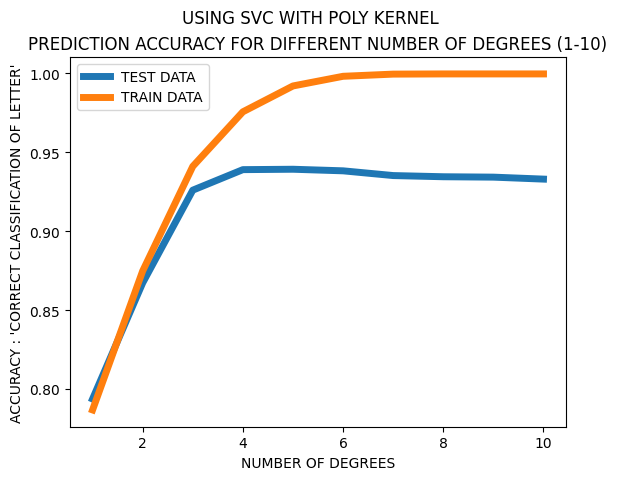

In [22]:

accuracys = []
accuracys2 = []
tests = []
for i in range(1,11):
    model = SVC(kernel='poly',degree=i,random_state=0)
    model.fit(train_X,train_y)
    y_pred = model.predict(test_X)
    accuracys.append(accuracy_score(test_y,y_pred))
    y_pred = model.predict(train_X)
    accuracys2.append(accuracy_score(train_y,y_pred))
    tests.append(i)
    

graph = pd.DataFrame({'tests':tests, 'TestData':accuracys,'TrainData':accuracys2})
print(graph)
sns.lineplot(data=graph, x="tests", y="TestData", linewidth=5,label="TEST DATA")
sns.lineplot(data=graph, x="tests", y="TrainData", linewidth=5, label ="TRAIN DATA")
plt.title("PREDICTION ACCURACY FOR DIFFERENT NUMBER OF DEGREES (1-10)")
plt.suptitle("USING SVC WITH POLY KERNEL")
plt.xlabel("NUMBER OF DEGREES")
plt.ylabel("ACCURACY : 'CORRECT CLASSIFICATION OF LETTER'")
plt.show()

## Conclusion
The best results for the Test Data Classification Rate came from the random forest clasifier 0.96475 and the KNN 0.9675 .
The worst resuls for the Test Data Classification Rate came from the Decision Tree Classifier 0.89825 .
Somewhere in between was the SVC with poly kernel 0.93925.

The models seem to generalize decently as there remains a high rate of accuracy among different test data sizes :

   tests  TestDataRFC  TrainDataRFC  TestDataKNN  TrainDataKNN
0    0.1     0.962500      0.999611     0.960000      0.999611
1    0.2     0.964750      0.999625     0.967500      0.999625
2    0.3     0.960167      0.999643     0.960833      0.999643
3    0.4     0.956875      0.999750     0.957875      0.999750
4    0.5     0.951000      0.999700     0.950500      0.999700
5    0.6     0.938250      0.999875     0.942083      0.999875
6    0.7     0.931214      0.999833     0.934000      0.999833
7    0.8     0.905813      0.999750     0.914813      0.999750
8    0.9     0.865278      1.000000     0.879389      1.000000


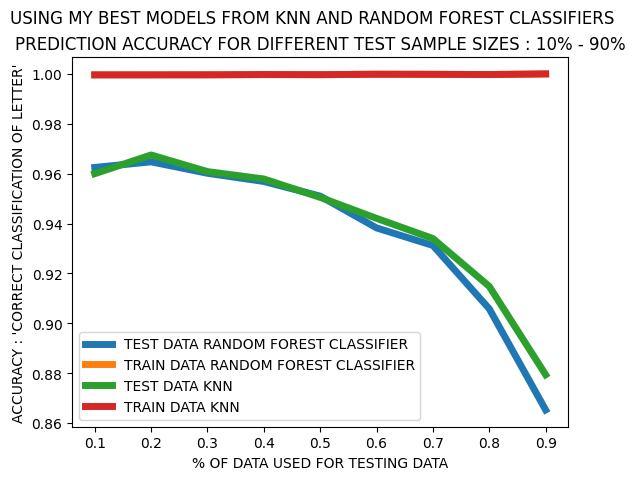

In [23]:
accuracys = [[],[],[],[]]
tests = []
test_size = 0.0

for i in range(9):
    test_size = round(test_size + 0.1 , 2)
    train_X,test_X,train_y,test_y = train_test_split(X,y,test_size=test_size,random_state=0)
    model = RandomForestClassifier(random_state=0,n_estimators=600,n_jobs=-1)
    model.fit(train_X,train_y)
    y_pred = model.predict(test_X)
    accuracys[0].append(accuracy_score(test_y,y_pred))
    y_pred = model.predict(train_X)
    accuracys[1].append(accuracy_score(train_y,y_pred))
    
    model = KNeighborsClassifier(n_neighbors=3,weights='distance')
    model.fit(train_X, train_y)
    y_pred = model.predict(test_X)
    accuracys[2].append(accuracy_score(test_y,y_pred))
    y_pred = model.predict(train_X)
    accuracys[3].append(accuracy_score(train_y,y_pred))
    
    tests.append(test_size)
    


graph = pd.DataFrame({'tests':tests, 'TestDataRFC':accuracys[0],'TrainDataRFC':accuracys[1],'TestDataKNN':accuracys[2],'TrainDataKNN':accuracys[3]})
print(graph)
sns.lineplot(data=graph, x="tests", y="TestDataRFC", linewidth=5,label="TEST DATA RANDOM FOREST CLASSIFIER")
sns.lineplot(data=graph, x="tests", y="TrainDataRFC", linewidth=5, label ="TRAIN DATA RANDOM FOREST CLASSIFIER")
sns.lineplot(data=graph, x="tests", y="TestDataKNN", linewidth=5, label ="TEST DATA KNN")
sns.lineplot(data=graph, x="tests", y="TrainDataKNN", linewidth=5, label ="TRAIN DATA KNN")
plt.title("PREDICTION ACCURACY FOR DIFFERENT TEST SAMPLE SIZES : 10% - 90%")
plt.suptitle("USING MY BEST MODELS FROM KNN AND RANDOM FOREST CLASSIFIERS")
plt.xlabel("% OF DATA USED FOR TESTING DATA")
plt.ylabel("ACCURACY : 'CORRECT CLASSIFICATION OF LETTER'")
plt.show()

## REFERENCES
1.	P. W. Frey and D. J. Slate. "Letter Recognition Using Holland-style Adaptive Classifiers". Machine Learning 6(2), 1991
Frey, P.W., Slate, D.J. Letter recognition using Holland-style adaptive classifiers. Mach Learn 6, 161–182 (1991). https://doi.org/10.1007/BF00114162

